In [15]:
# https://www.kaggle.com/c/mnist-en
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/"
train_data = pd.read_csv(data_path + 'train.csv', index_col=0)
test_data = pd.read_csv(data_path + 'test.csv', index_col=0)
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
Id,,,,,,,,,,,,,,,,,,,,,
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X, y = train_data.drop('label', axis=1).to_numpy(), train_data['label'].to_numpy()

In [17]:
def plot_digit(x_set, y_set, idx):
    img = x_set[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y_set.T[idx])
    plt.show()

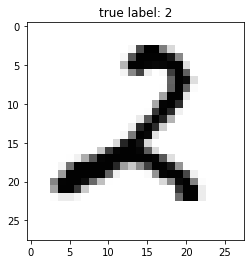

In [18]:
plot_digit(X, y, idx = 41575)

(array([5874., 6660., 5953., 6059., 5817., 5361., 5841., 6195., 5814.,
        5929.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

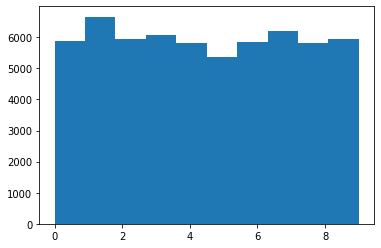

In [19]:
unique, counts = np.unique(y, return_counts=True)
#print(np.asarray((unique, counts)).T)
plt.hist(y)

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y.reshape(-1, 1)).toarray()

In [21]:
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
X = X.astype('float32') / 255.0

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#from keras.utils import to_categorical, plot_model

# ANN

In [25]:
# network parameters
batch_size = 128
hidden_units = 256
input_size = X_train.shape[1]
num_labels = 10
def define_model():
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])
    return model
model = define_model()

In [26]:
model.fit(X_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
377/377 [==============================] - 3s 6ms/step - loss: 0.2948 - accuracy: 0.9128
Epoch 2/20
377/377 [==============================] - 2s 6ms/step - loss: 0.1060 - accuracy: 0.9683
Epoch 3/20
377/377 [==============================] - 2s 6ms/step - loss: 0.0698 - accuracy: 0.9787
Epoch 4/20
377/377 [==============================] - 2s 6ms/step - loss: 0.0476 - accuracy: 0.9846
Epoch 5/20
377/377 [==============================] - 2s 6ms/step - loss: 0.0348 - accuracy: 0.9891
Epoch 6/20
377/377 [==============================] - 2s 6ms/step - loss: 0.0255 - accuracy: 0.9919
Epoch 7/20
377/377 [==============================] - 2s 6ms/step - loss: 0.0208 - accuracy: 0.9935
Epoch 8/20
377/377 [==============================] - 2s 6ms/step - loss: 0.0179 - accuracy: 0.9942
Epoch 9/20
377/377 [==============================] - 2s 6ms/step - loss: 0.0180 - accuracy: 0.9939
Epoch 10/20
377/377 [==============================] - 2s 5ms/step - loss: 0.0138 - accuracy: 0.9952

In [27]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

47/47 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.9780

Test accuracy: 97.8%


# CNN

In [28]:
from keras.datasets import mnist
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization

In [29]:
X_train2 = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test2 = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [30]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = define_model()
model.fit(X_train2, y_train, epochs=20, batch_size=batch_size)

C:\Users\kam\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
377/377 [==============================] - 19s 49ms/step - loss: 0.2933 - accuracy: 0.9112
Epoch 2/20
377/377 [==============================] - 18s 49ms/step - loss: 0.1235 - accuracy: 0.9627
Epoch 3/20
377/377 [==============================] - 20s 52ms/step - loss: 0.0870 - accuracy: 0.9741
Epoch 4/20
377/377 [==============================] - 20s 52ms/step - loss: 0.0669 - accuracy: 0.9804
Epoch 5/20
377/377 [==============================] - 19s 49ms/step - loss: 0.0551 - accuracy: 0.9836
Epoch 6/20
377/377 [==============================] - 19s 51ms/step - loss: 0.0444 - accuracy: 0.9865
Epoch 7/20
377/377 [==============================] - 20s 52ms/step - loss: 0.0376 - accuracy: 0.9892
Epoch 8/20
377/377 [==============================] - 19s 51ms/step - loss: 0.0318 - accuracy: 0.9908
Epoch 9/20
377/377 [==============================] - 20s 54ms/step - loss: 0.0279 - accuracy: 0.9920
Epoch 10/20
377/377 [==============================] - 18s 48ms/step - loss: 0.024

In [31]:
loss, acc = model.evaluate(X_test2, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

47/47 [==============================] - 1s 17ms/step - loss: 0.0543 - accuracy: 0.9845

Test accuracy: 98.5%


In [35]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<AxesSubplot:>

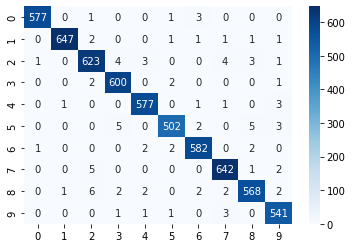

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test2)
y_pred = np.argmax(y_pred, axis=1).T
y_test = np.argmax(y_test, axis=1).T
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')

CNN model is a bit better, so we will use it for creating a submission file

# Save results

In [38]:
import tensorflow as tf
path = "model/CNN.pickle"
model.save(path)
model = tf.keras.models.load_model(path)

INFO:tensorflow:Assets written to: model/CNN.pickle\assets


In [46]:
X_res = test_data.to_numpy()
X_res2 = X_res.reshape((X_res.shape[0], 28, 28, 1))

In [47]:
pred = model.predict(X_res2)

In [59]:
y_pred = np.argmax(pred, axis=1).T
test_data["label"] = y_pred

In [60]:
test_data["label"].to_csv("result/mnist.csv", index=True)